<a href="https://colab.research.google.com/github/Vikaas1517/Unsupervised-Learning/blob/main/Agglomerative_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
print("First 5 rows of the DataFrame:")
print(data.head())

print("\nMissing values in each column:")
print(data.isnull().sum())

print("\nInformation about data types and non-null values:")
data.info()

print("\nDescriptive statistics for numerical columns:")
print(data.describe())

First 5 rows of the DataFrame:
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40

Missing values in each column:
CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Information about data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 no

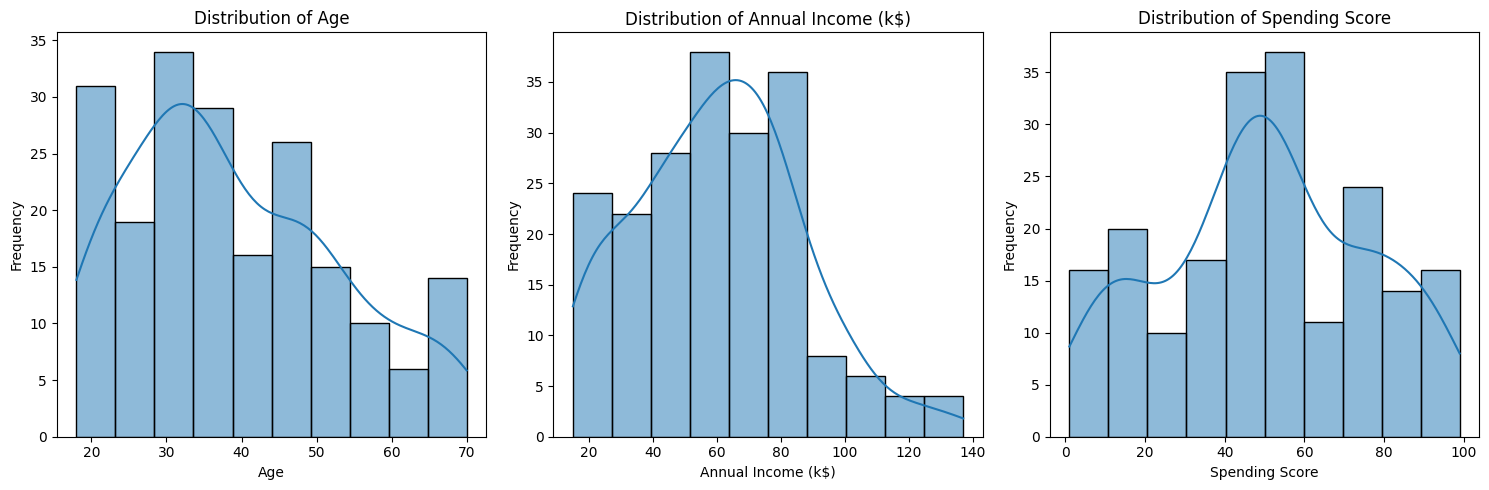

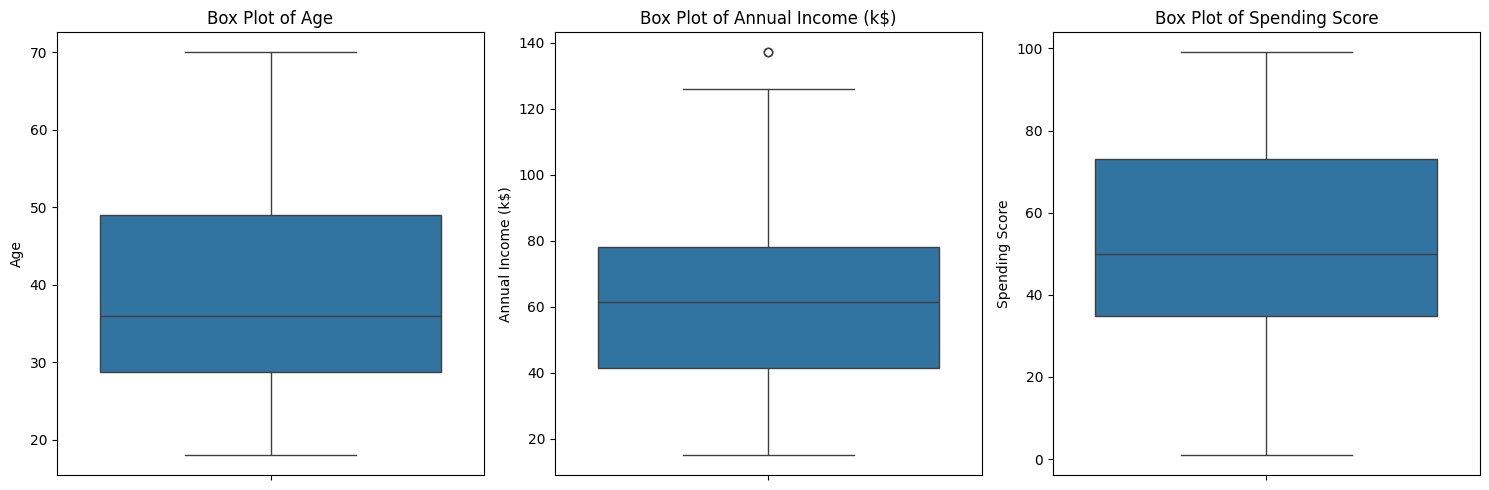

/tmp/ipython-input-702183907.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Genre'], palette='viridis')


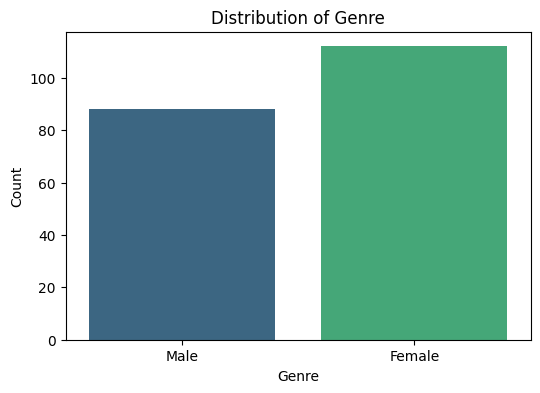

In [6]:
plt.figure(figsize=(15, 5))

# Histograms for numerical features
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual_Income_(k$)'], bins=10, kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending_Score'], bins=10, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# Box plots for numerical features
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Annual_Income_(k$)'])
plt.title('Box Plot of Annual Income (k$)')
plt.ylabel('Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['Spending_Score'])
plt.title('Box Plot of Spending Score')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

# Count plot for 'Genre'
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Genre'], palette='viridis')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

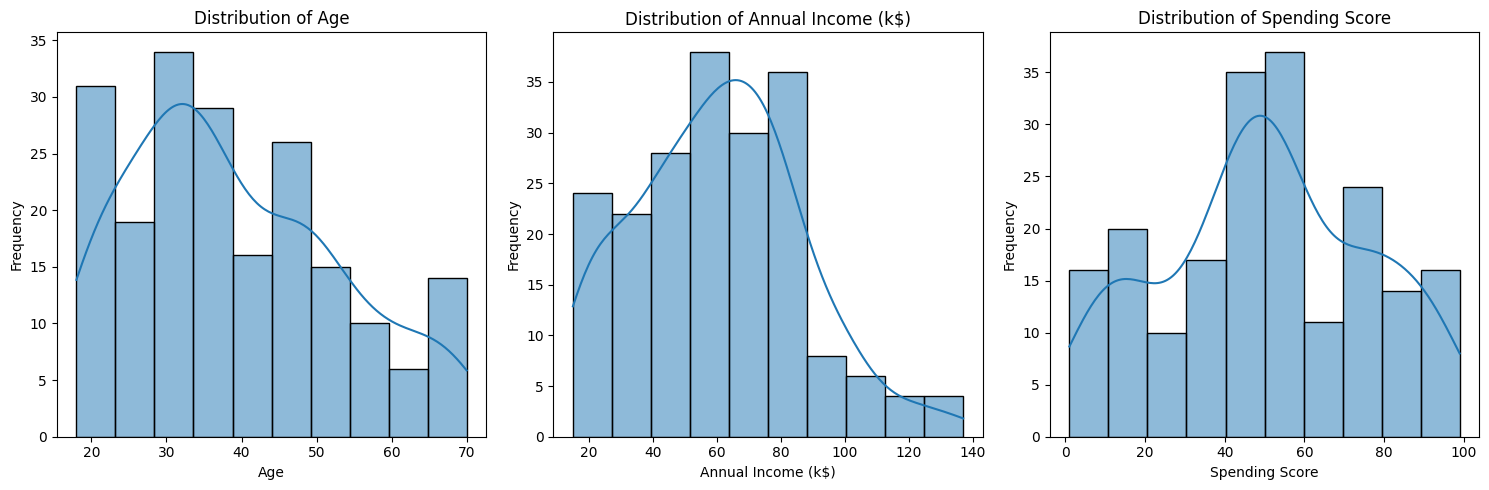

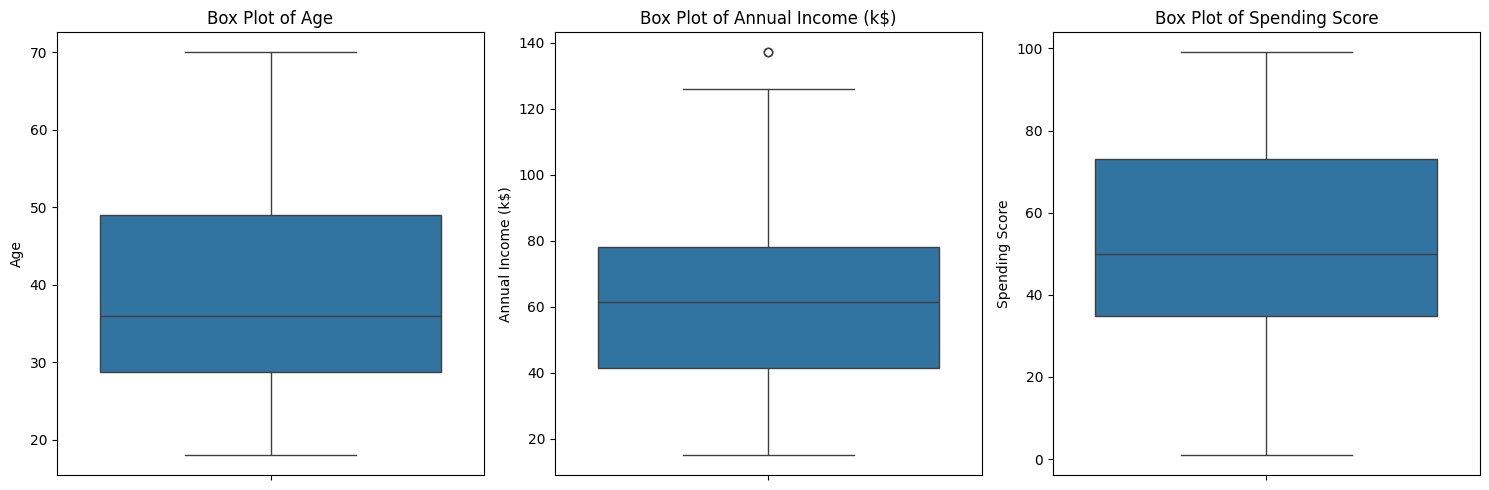

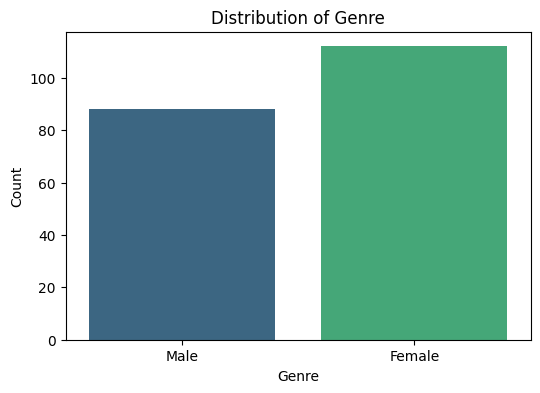

In [7]:
plt.figure(figsize=(15, 5))

# Histograms for numerical features
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(data['Annual_Income_(k$)'], bins=10, kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data['Spending_Score'], bins=10, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

# Box plots for numerical features
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Age'])
plt.title('Box Plot of Age')
plt.ylabel('Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=data['Annual_Income_(k$)'])
plt.title('Box Plot of Annual Income (k$)')
plt.ylabel('Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.boxplot(y=data['Spending_Score'])
plt.title('Box Plot of Spending Score')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

# Count plot for 'Genre'
plt.figure(figsize=(6, 4))
sns.countplot(x=data['Genre'], hue=data['Genre'], palette='viridis', legend=False)
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

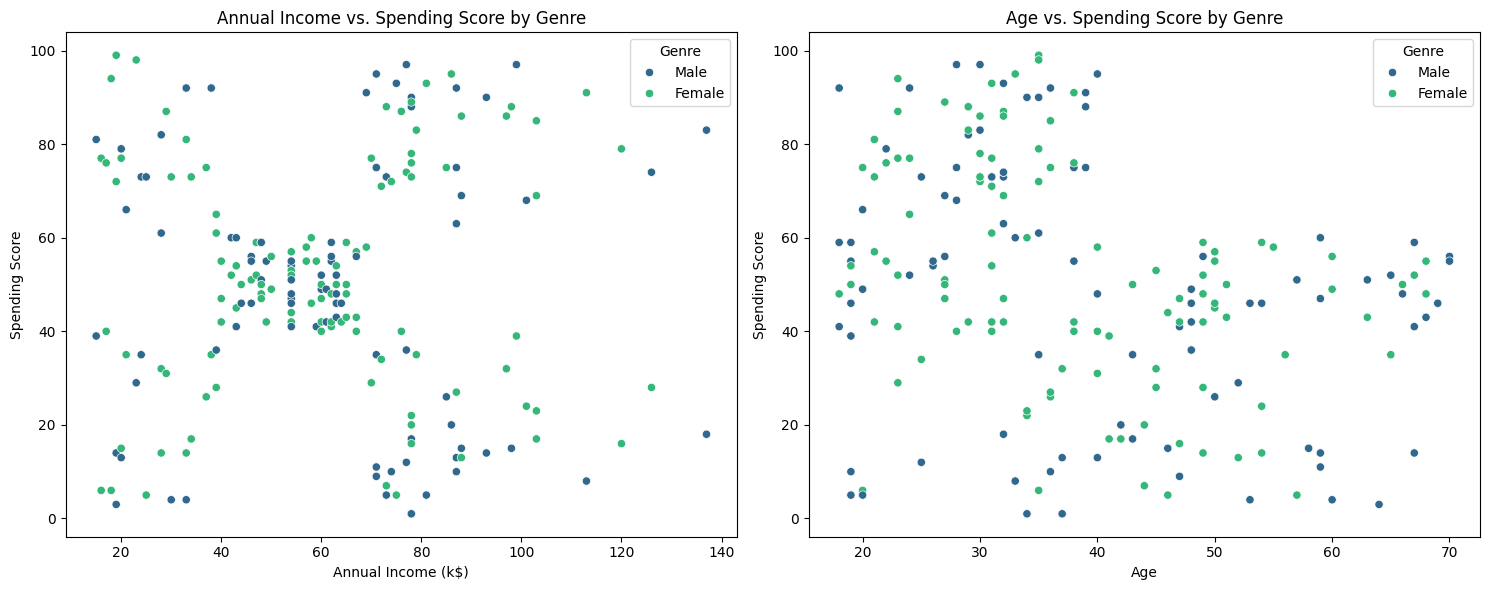

In [8]:
plt.figure(figsize=(15, 6))

# Scatter plot for Annual Income vs. Spending Score by Genre
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='Annual_Income_(k$)', y='Spending_Score', hue='Genre', palette='viridis')
plt.title('Annual Income vs. Spending Score by Genre')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

# Scatter plot for Age vs. Spending Score by Genre
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='Age', y='Spending_Score', hue='Genre', palette='viridis')
plt.title('Age vs. Spending Score by Genre')
plt.xlabel('Age')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# Select the relevant numerical features for clustering
X = data[['Annual_Income_(k$)', 'Spending_Score']]

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Apply fit_transform to scale the data
X_scaled = scaler.fit_transform(X)

print("First 5 rows of original features (Annual Income, Spending Score):")
print(X.head())
print("\nFirst 5 rows of scaled features:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

First 5 rows of original features (Annual Income, Spending Score):
   Annual_Income_(k$)  Spending_Score
0                  15              39
1                  15              81
2                  16               6
3                  16              77
4                  17              40

First 5 rows of scaled features:
   Annual_Income_(k$)  Spending_Score
0           -1.738999       -0.434801
1           -1.738999        1.195704
2           -1.700830       -1.715913
3           -1.700830        1.040418
4           -1.662660       -0.395980


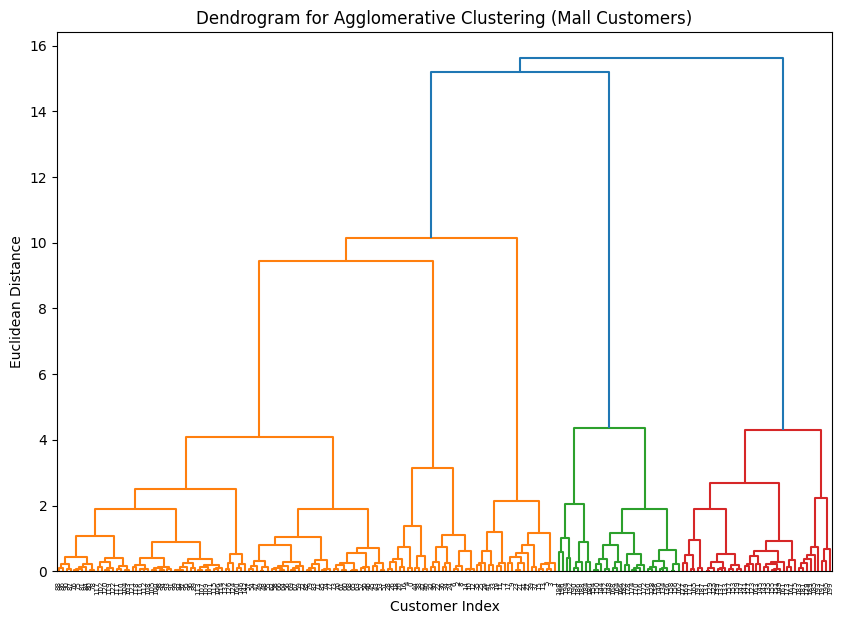

Dendrogram plotted successfully to visualize cluster mergers and assist in determining the optimal number of clusters.


In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
linked_data = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_data,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering (Mall Customers)')
plt.xlabel('Customer Index')
plt.ylabel('Euclidean Distance')
plt.show()
print("Dendrogram plotted successfully to visualize cluster mergers and assist in determining the optimal number of clusters.")

In [12]:
from sklearn.cluster import AgglomerativeClustering

# Instantiate AgglomerativeClustering with n_clusters=5
# (assuming 5 clusters from dendrogram visual inspection)
agg_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Fit the model and get cluster labels
clusters = agg_clustering.fit_predict(X_scaled)

# Add the cluster labels as a new column to the original DataFrame
data['Cluster'] = clusters

print("First 5 rows of DataFrame with new 'Cluster' column:")
print(data.head())

print("\nCount of data points in each cluster:")
print(data['Cluster'].value_counts())

First 5 rows of DataFrame with new 'Cluster' column:
   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score  Cluster
0           1    Male   19                  15              39        4
1           2    Male   21                  15              81        3
2           3  Female   20                  16               6        4
3           4  Female   23                  16              77        3
4           5  Female   31                  17              40        4

Count of data points in each cluster:
Cluster
2    85
1    39
0    32
4    23
3    21
Name: count, dtype: int64


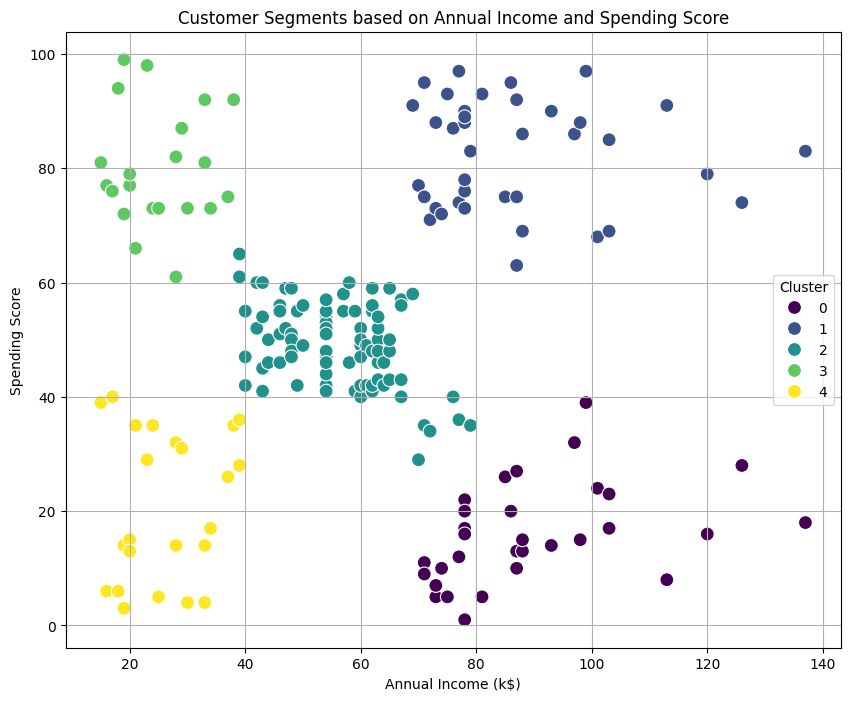

In [13]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='Annual_Income_(k$)', y='Spending_Score', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [14]:
cluster_means = data.groupby('Cluster')[['Age', 'Annual_Income_(k$)', 'Spending_Score']].mean()
print("Average characteristics of each cluster:\n", cluster_means)

Average characteristics of each cluster:
                Age  Annual_Income_(k$)  Spending_Score
Cluster                                               
0        41.000000           89.406250       15.593750
1        32.692308           86.538462       82.128205
2        42.482353           55.811765       49.129412
3        25.333333           25.095238       80.047619
4        45.217391           26.304348       20.913043


In [15]:
cluster_genre_distribution = data.groupby('Cluster')['Genre'].value_counts(normalize=True).unstack(fill_value=0)
print("Genre distribution within each cluster:\n", cluster_genre_distribution)

Genre distribution within each cluster:
 Genre      Female      Male
Cluster                    
0        0.437500  0.562500
1        0.538462  0.461538
2        0.600000  0.400000
3        0.571429  0.428571
4        0.608696  0.391304
